<a href="https://colab.research.google.com/github/falahazmi/PCVK_Genap_2021/blob/main/Week10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TUGAS PRAKTIKUM THRESHOLDING**

In [26]:
# No 1
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
# No 2
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

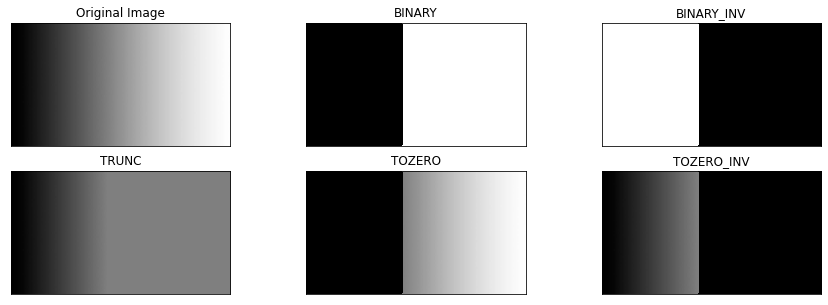

In [50]:
filename = ('/content/drive/MyDrive/PCVK_MM/Images/gradient.jpg')
img = cv2.imread(filename)
threshold1 = cv2.imread(filename)
threshold2 = cv2.imread(filename)
threshold3 = cv2.imread(filename)
threshold4 = cv2.imread(filename)
threshold5 = cv2.imread(filename)
threshold = 127                   #nilai Threshold

#1 Threshold 1 binary
threshold1[img>threshold] = 255
threshold1[img<=threshold] = 0

#2 Threshold 2 Binary Inverse
threshold2 = 255 - threshold1

#3 Threshold 3 Truncate
threshold3[img>threshold] = threshold

#4 Threshold 4 Tozero
threshold4[img<=threshold] = 0

#5 Threshold 5 Tozero Inverse
threshold5[img>threshold] = 0

titles = ['Original Image','BINARY','BINARY_INV','TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, threshold1, threshold2,threshold3,threshold4,threshold5]

plt.figure(figsize = (15,5)) 
for i in range(len(images)):
  plt.subplot(2,3,i+1),plt.imshow(images[i],'gray', interpolation='nearest') 
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([]) 
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide


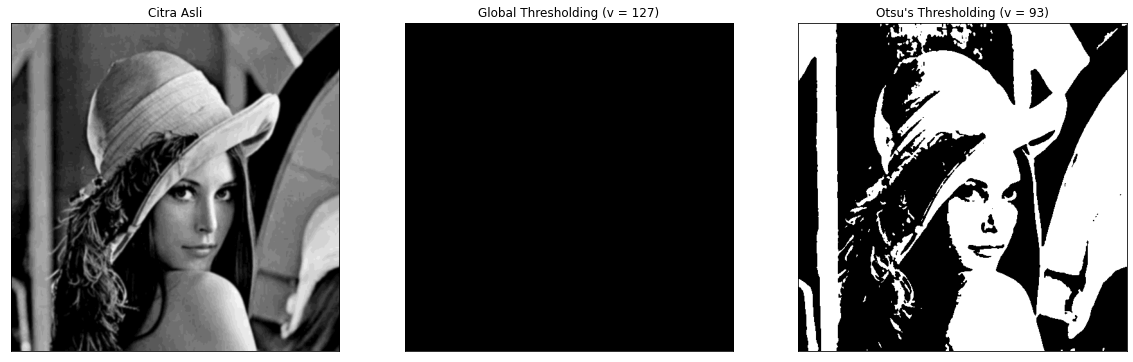

In [29]:
# No 4
filename = ('/content/drive/MyDrive/PCVK_MM/Images/lena_gs_lc2.jpg')
img = cv2.imread(filename,0) 
blur = cv2. GaussianBlur (img, (5,5),0)

hist = cv2.calcHist([blur],[0],None,[256], [0,256]) 
hist_norm = hist.ravel()/hist.max() 
Q = hist_norm.cumsum() 
bins = np.arange (256) 
wb = 0 
sumb = 0 
varmax = 0 
fn_min = np.inf 
thresh = -1 
for i in range(0,255):
  wb += hist[i] 
  wf = (img.shape[0]*img.shape[1]) - wb 
  sumb += (i*hist[i]) 
  mb = sumb / wb 
  mf = (sumb - sumb)/wf 
  betweenvar = wb * wf * (mb - mf) * (mb - mf) 
  if (betweenvar>varmax):
    varmax = betweenvar
    thresh = i 
x = ("Otsu's Thresholding (v = ")+str(thresh)+")" 
ret, th1 = cv2.threshold(blur, 127, 255, cv2.THRESH_BINARY)
ret, th2 = cv2.threshold (blur, thresh, 255, cv2. THRESH_BINARY)

titles = ['Citra Asli', 'Global Thresholding (v = 127)', x] 
citra3 = [blur, th1, th2]

plt. figure(figsize = (20,15)) 
for i in range(len(citra3)):
    plt. subplot(1,3,i+1),plt.imshow(citra3[i], 'gray') 
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([]) 
plt.show()  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version,

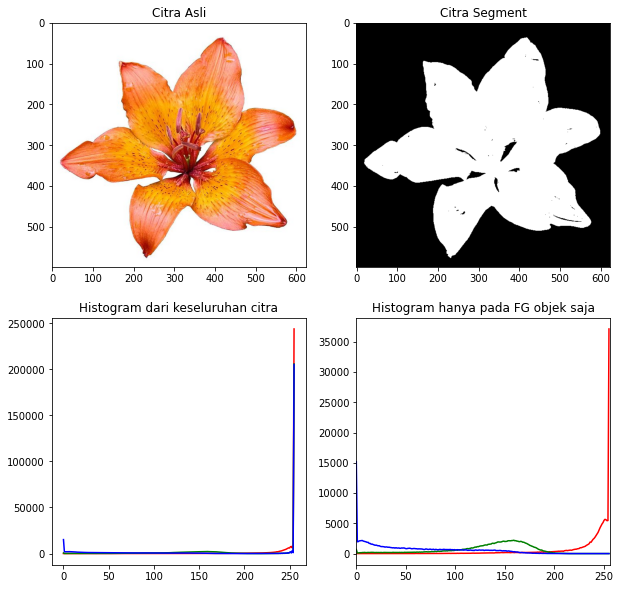

In [33]:
# No 5
filename = ('/content/drive/MyDrive/PCVK_MM/Images/lily.jpg')

img = cv2.imread(filename) 
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) 
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

ret3,mask = cv2.threshold(img_gray,200,255,cv2.THRESH_BINARY_INV)

plt.figure(figsize = (10,10)) 
plt.subplot(2,2,1),plt.imshow(img) 
plt.title('Citra Asli') 
plt.subplot(2,2,2),plt.imshow(mask, 'gray') 
plt.title('Citra Segment') 
color = ('r','g','b') 
for i,col in enumerate(color):
    hist0 = cv2.calcHist([img],[i],None,[256],[0,256]) 
    plt.subplot(2,2,3),plt.plot(hist0,color = col) 
    plt.title('Histogram dari keseluruhan citra') 
    hist1 = cv2.calcHist([img],[i],mask,[256],[0,256]) 
    plt.subplot(2,2,4),plt.plot(hist1,color = col) 
    plt.title('Histogram hanya pada FG objek saja')
    plt.xlim([0,256]) 
plt.show()

(<matplotlib.axes._subplots.AxesSubplot at 0x7f2c825b6ed0>,
 <matplotlib.image.AxesImage at 0x7f2c81f8af10>)

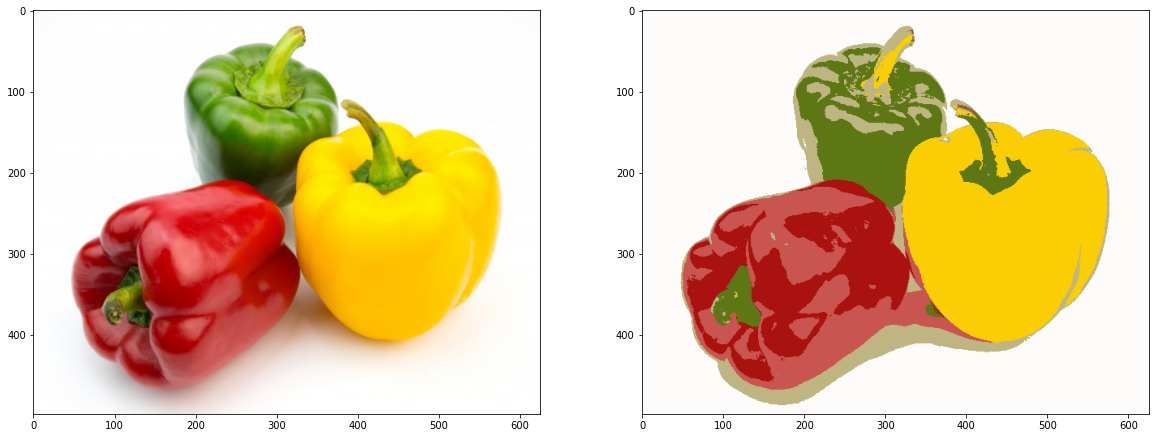

In [40]:
# No 6

#KMeans Image Segmentation
filename = ('/content/drive/MyDrive/PCVK_MM/Images/peppers.jpg')
img = cv2.imread(filename)
img = cv2.cvtColor(img,cv.COLOR_BGR2RGB)
'''
kita akan menggunakan fungsi cv.kmeans() yang meminta array 2D sebagai masukan, sedangkan image aslinya adalah array 3D
selanjutnya kita perlu melakukan flattening array image masukan
'''
#reshape array ke bentuk 2D
pixel_values = img.reshape((-1, 3))
# convert to float
pixel_values = np.float32(pixel_values)

'''
syarat berhenti iterasi dr KMeans adalah jika centroid sudah tidak terlalu banyak pergeseran posisi antara interasi sekarang
dengan iterasi sebelumnya (konvergen). Karena jumlah data yang besar, maka kita akan hentikan iterasi saat jumlah iterasi = 100
atau epsilon(selisih antara posisi centroid skrg dgn posisi centroid di iterasi sebelumnya) < 0.2
'''
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
'''
jika diperhatikan pada image asli, terdapat 3 warna utama (hijau, biru, dan putih/orange). untuk percobaan ini kita akan gunakan 3 cluster untuk image ini
'''
k = 6
_, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
#konversi titik centroid kedalam integer
centers = np.uint8(centers)
#flattening label array
labels = labels.flatten()
#konversi warna pixel asli kewarna dari tiap centroidnya
segmented_image = centers[labels.flatten()]
# reshape ke bentuk image asli
segmented_image = segmented_image.reshape(img.shape)
plt.figure(figsize = (20,20))
plt.subplot(1,2,1),plt.imshow(img)
plt.subplot(1,2,2),plt.imshow(segmented_image)

(<matplotlib.axes._subplots.AxesSubplot at 0x7f2c823755d0>,
 <matplotlib.image.AxesImage at 0x7f2c81f194d0>)

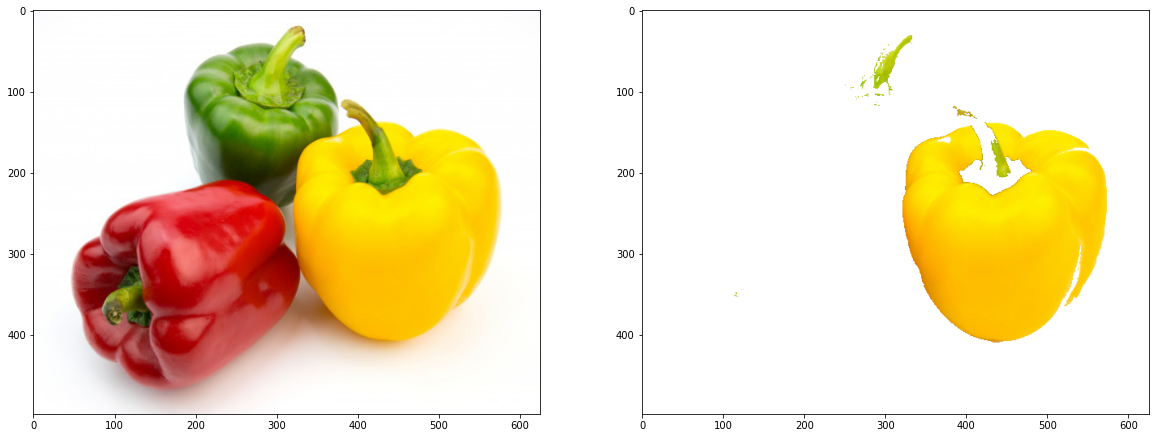

In [41]:
masked_image = np.copy(img)
# konvert ke bentuk vektor
masked_image = masked_image.reshape((-1, 3))
# cluster selain yang diubah
cluster = 5
masked_image[labels != cluster] = [255, 255, 255]
# konvert ke bentuk asli
masked_image = masked_image.reshape(img.shape)
plt.figure(figsize = (20,12))
plt.subplot(1,2,1),plt.imshow(img)
plt.subplot(1,2,2),plt.imshow(masked_image)

(<matplotlib.axes._subplots.AxesSubplot at 0x7f2c84483b50>,
 <matplotlib.image.AxesImage at 0x7f2c822ba6d0>)

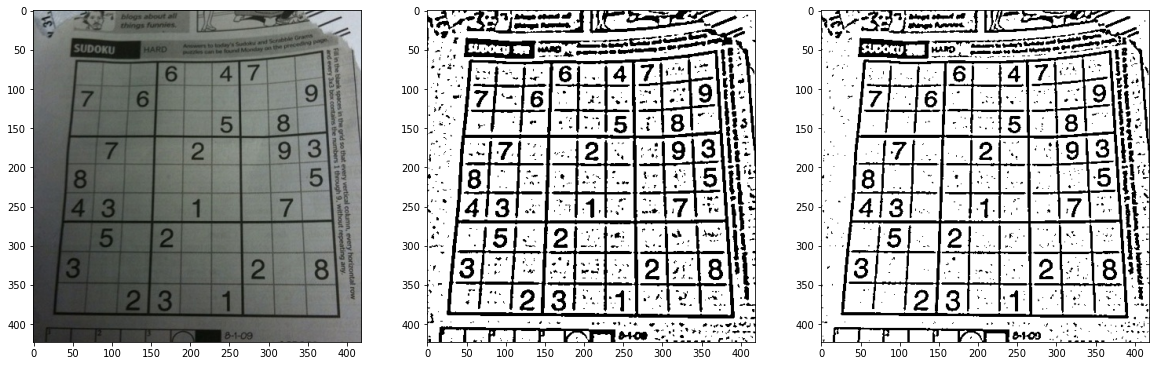

In [39]:
# No 7
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt
filename = ('/content/drive/MyDrive/PCVK_MM/Images/sudoku-original.jpg')
img = cv2.imread(filename) 
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
blur = cv2. GaussianBlur (img_gray, (5,5),0)
th2 = cv.adaptiveThreshold(blur,255,cv.ADAPTIVE_THRESH_MEAN_C,cv.THRESH_BINARY,11,2)
th3 = cv.adaptiveThreshold(blur,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,cv.THRESH_BINARY,11,2)
plt.figure(figsize = (20,20))
plt.subplot(1,3,1),plt.imshow(img)
plt.subplot(1,3,2),plt.imshow(th2, 'gray')
plt.subplot(1,3,3),plt.imshow(th3, 'gray')